<a href="https://colab.research.google.com/github/ZoryAce/Topicos/blob/main/ENTREGA1/PROYECTO1/proyecto_1_Topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frailejon Detection (a.k.a "Big Monks Detection")**

**Integrantes:**

Luis Alejandro Garzón Ramirez

Zorayda Acevedo Jimenez

Yulieth Danitza Aguillón Ortega

# **Data**
Input:

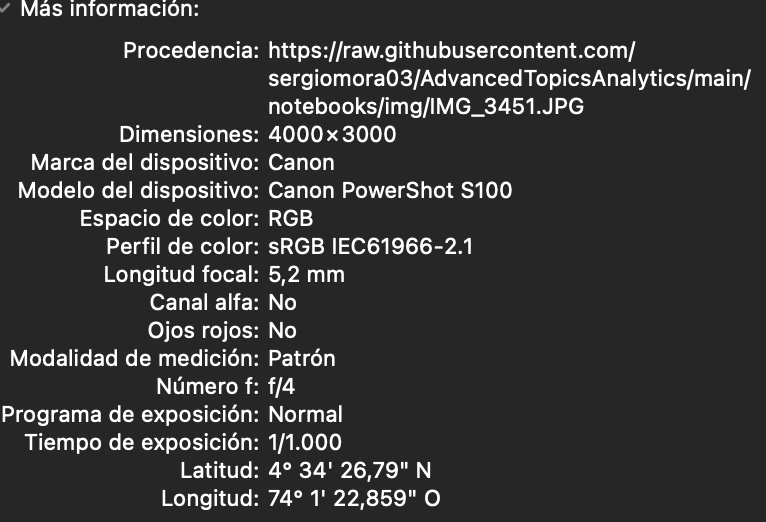

A continuación llamamos los paquetes que vamos a utilizar:

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers


import random
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
import random
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


import optuna
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [ ]:
import urllib
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/ImportImagenesURL.py',
    'ImportImagenes.py'
  )

('ImportImagenes.py', <http.client.HTTPMessage at 0x7b1f032bcc90>)

In [ ]:
from tensorflow.keras.utils import load_img # import load_img from the correct module


urllib.request.urlretrieve('https://github.com/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/img/IMG_3451.JPG?raw=true', 'IMG_3451.JPG')
img = load_img('IMG_3451.JPG')
img

Imagen cargada correctamente.


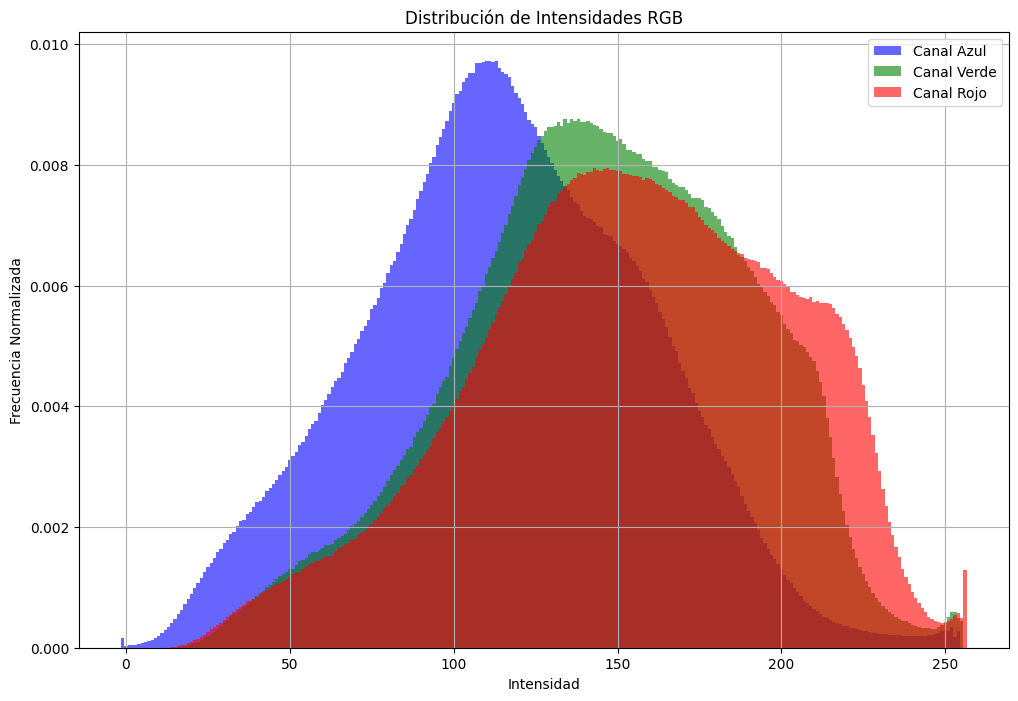

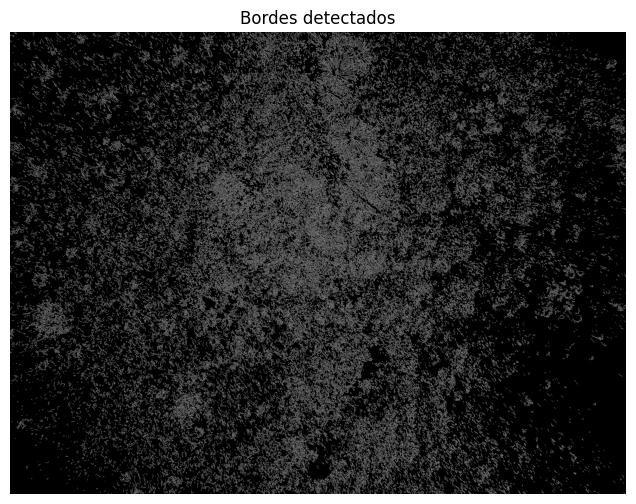

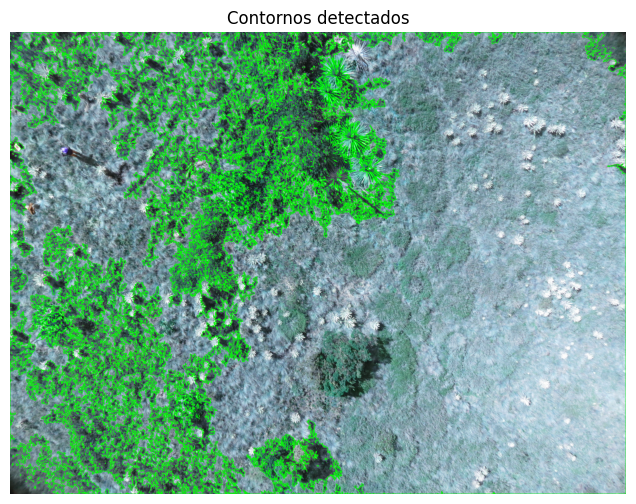

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

# URL de la imagen
img_url = 'https://github.com/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/img/IMG_3451.JPG?raw=true'

# Nombre del archivo donde se guardará la imagen descargada
img_name = 'IMG_3451.JPG'

# Descargar la imagen desde la URL
urllib.request.urlretrieve(img_url, img_name)

# Verificar si el archivo se descargó correctamente
if os.path.exists(img_name):
    # Cargar la imagen en color (RGB)
    imagen = cv2.imread(img_name)

    # Verificar si la imagen se cargó correctamente
    if imagen is not None:
        print("Imagen cargada correctamente.")

        # Dividir la imagen en canales (BGR en OpenCV por defecto)
        (blue, green, red) = cv2.split(imagen)

        # Calcular los histogramas para cada canal de color
        hist_b = cv2.calcHist([blue], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([green], [0], None, [256], [0, 256])
        hist_r = cv2.calcHist([red], [0], None, [256], [0, 256])

        # Normalizar los histogramas
        hist_b /= hist_b.sum()
        hist_g /= hist_g.sum()
        hist_r /= hist_r.sum()

        # Crear el gráfico de barras agrupadas para las distribuciones de intensidad RGB
        plt.figure(figsize=(12, 8))

        # Usar `plt.bar()` para los histogramas de cada canal
        width = 1  # El ancho de cada barra
        plt.bar(np.arange(256) - width, hist_b.flatten(), width=width, color='blue', alpha=0.6, label='Canal Azul')
        plt.bar(np.arange(256), hist_g.flatten(), width=width, color='green', alpha=0.6, label='Canal Verde')
        plt.bar(np.arange(256) + width, hist_r.flatten(), width=width, color='red', alpha=0.6, label='Canal Rojo')

        # Añadir título y etiquetas
        plt.title('Distribución de Intensidades RGB')
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia Normalizada')
        plt.legend()
        plt.grid(True)

        # Mostrar la gráfica
        plt.show()

        # ----------------------------- DETECCIÓN DE BORDES -----------------------------

        # Convertir la imagen a escala de grises para la detección de bordes
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

        # Aplicar el detector de bordes de Canny
        bordes = cv2.Canny(imagen_gris, 100, 200)

        # Mostrar imagen con bordes detectados
        plt.figure(figsize=(10, 6))
        plt.imshow(bordes, cmap='gray')
        plt.title('Bordes detectados')
        plt.axis('off')
        plt.show()

        # -------------------------- DETECCIÓN DE CONTORNOS ---------------------------

        # Aplicar umbral para la detección de contornos
        _, umbral = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)

        # Detectar contornos
        contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Dibujar contornos sobre la imagen original
        imagen_con_contornos = imagen.copy()
        cv2.drawContours(imagen_con_contornos, contornos, -1, (0, 255, 0), 2)  # Dibujar contornos en verde

        # Mostrar imagen con contornos detectados
        plt.figure(figsize=(10, 6))
        plt.imshow(imagen_con_contornos)
        plt.title('Contornos detectados')
        plt.axis('off')
        plt.show()

    else:
        print("Error al cargar la imagen.")
else:
    print(f"La ruta {img_name} no es válida o el archivo no existe.")

#### Tomamos una muestra aleatoria para entender un poco mejor el dataset original

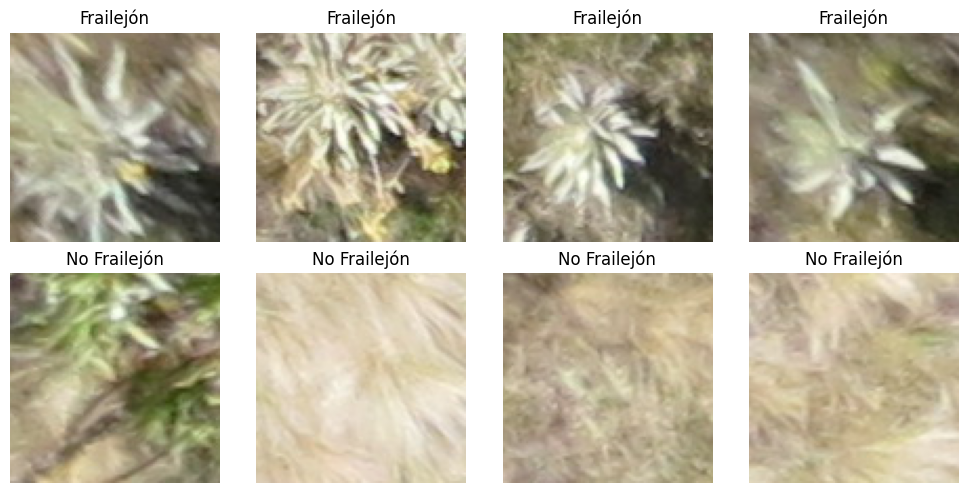

In [ ]:
import h5py
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Descargar el archivo HDF5
urllib.request.urlretrieve("https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/data_F", "data_F")

# Cargar el archivo
FF = h5py.File('data_F', 'r')

# Extraer imágenes
fraile = np.array(FF.get('Frailejon'))
nofraile = np.array(FF.get('NoFrailejon'))

# Seleccionar 4 imágenes aleatorias de cada categoría
np.random.seed(42)  # Para reproducibilidad
idx_fraile = np.random.choice(fraile.shape[0], 4, replace=False)
idx_nofraile = np.random.choice(nofraile.shape[0], 4, replace=False)

fraile_sample = fraile[idx_fraile]
nofraile_sample = nofraile[idx_nofraile]

# Graficar imágenes
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for i in range(4):
    # Frailejon
    axes[0, i].imshow(fraile_sample[i])
    axes[0, i].axis('off')
    axes[0, i].set_title("Frailejón")

    # No Frailejon
    axes[1, i].imshow(nofraile_sample[i])
    axes[1, i].axis('off')
    axes[1, i].set_title("No Frailejón")

plt.tight_layout()
plt.show()


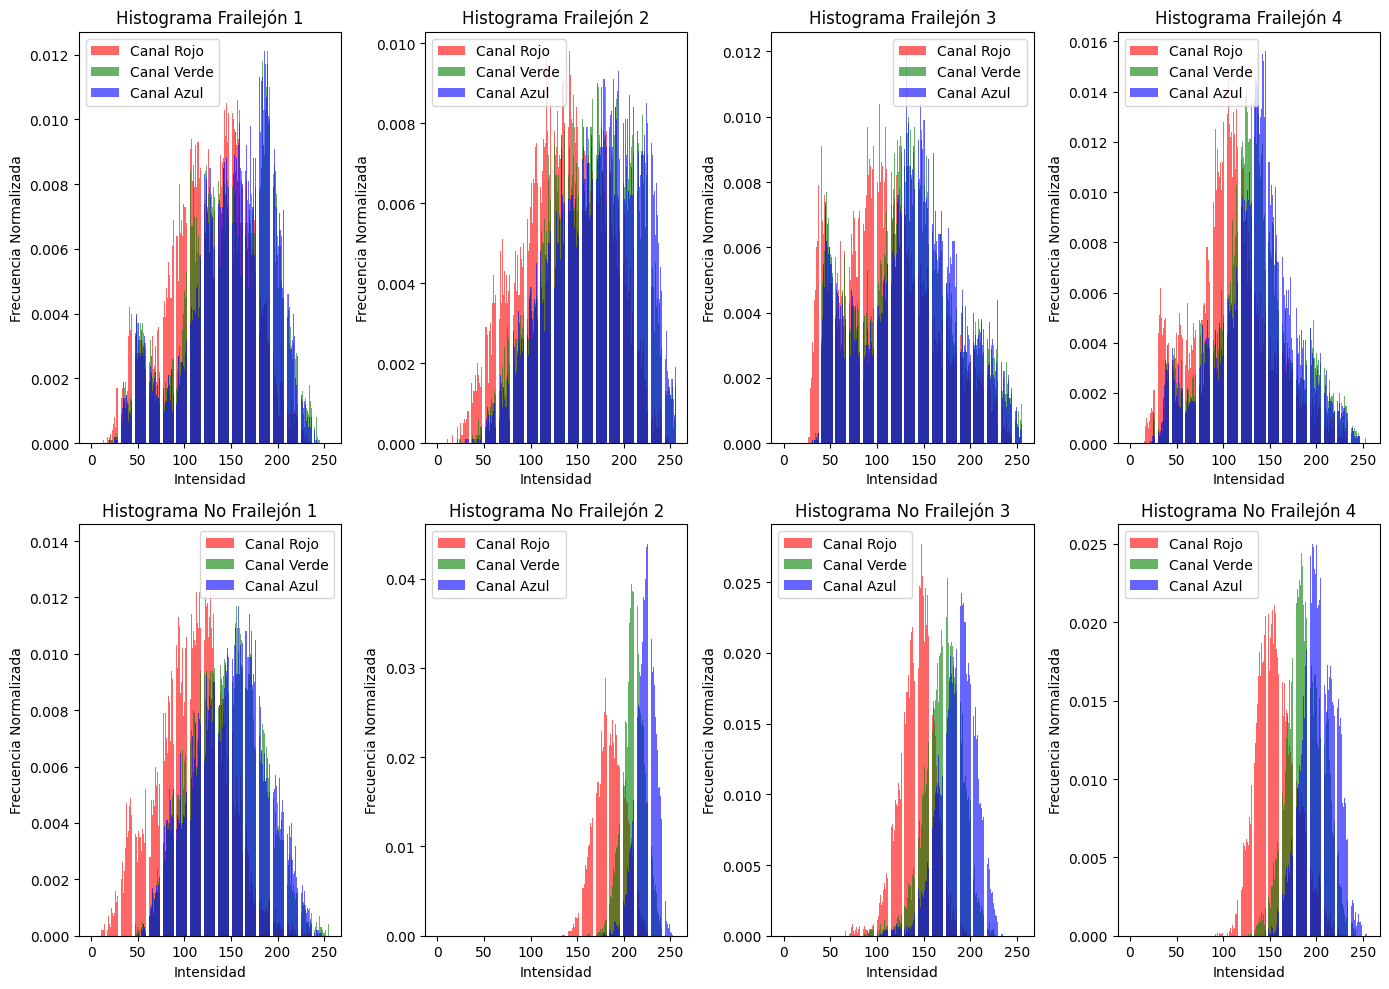

In [ ]:
# Función para calcular histogramas RGB
def calcular_histograma_rgb(imagen):
    # Convertir la imagen de formato BGR a RGB (si es necesario)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Dividir la imagen en canales R, G, B
    (rojo, verde, azul) = cv2.split(imagen_rgb)

    # Calcular los histogramas para cada canal de color
    hist_r = cv2.calcHist([rojo], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([verde], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([azul], [0], None, [256], [0, 256])

    # Normalizar los histogramas
    hist_r /= hist_r.sum()
    hist_g /= hist_g.sum()
    hist_b /= hist_b.sum()

    return hist_r, hist_g, hist_b

# Crear el gráfico de los histogramas en forma de barras
plt.figure(figsize=(14, 10))

# Graficar los histogramas para las imágenes de Frailejón
for i in range(4):
    hist_r, hist_g, hist_b = calcular_histograma_rgb(fraile_sample[i])

    # Graficar los histogramas de cada imagen de Frailejón en barras
    plt.subplot(2, 4, i+1)  # Ajuste aquí, se usa una cuadrícula 2x4
    plt.bar(np.arange(256), hist_r.flatten(), color='red', alpha=0.6, label='Canal Rojo')
    plt.bar(np.arange(256), hist_g.flatten(), color='green', alpha=0.6, label='Canal Verde')
    plt.bar(np.arange(256), hist_b.flatten(), color='blue', alpha=0.6, label='Canal Azul')
    plt.title(f"Histograma Frailejón {i+1}")
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia Normalizada')
    plt.legend()

# Graficar los histogramas para las imágenes de No Frailejón
for i in range(4):
    hist_r, hist_g, hist_b = calcular_histograma_rgb(nofraile_sample[i])

    # Graficar los histogramas de cada imagen de No Frailejón en barras
    plt.subplot(2, 4, i+5)  # Ajuste aquí también, para que encaje en una cuadrícula 2x4
    plt.bar(np.arange(256), hist_r.flatten(), color='red', alpha=0.6, label='Canal Rojo')
    plt.bar(np.arange(256), hist_g.flatten(), color='green', alpha=0.6, label='Canal Verde')
    plt.bar(np.arange(256), hist_b.flatten(), color='blue', alpha=0.6, label='Canal Azul')
    plt.title(f"Histograma No Frailejón {i+1}")
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia Normalizada')
    plt.legend()

plt.tight_layout()
plt.show()

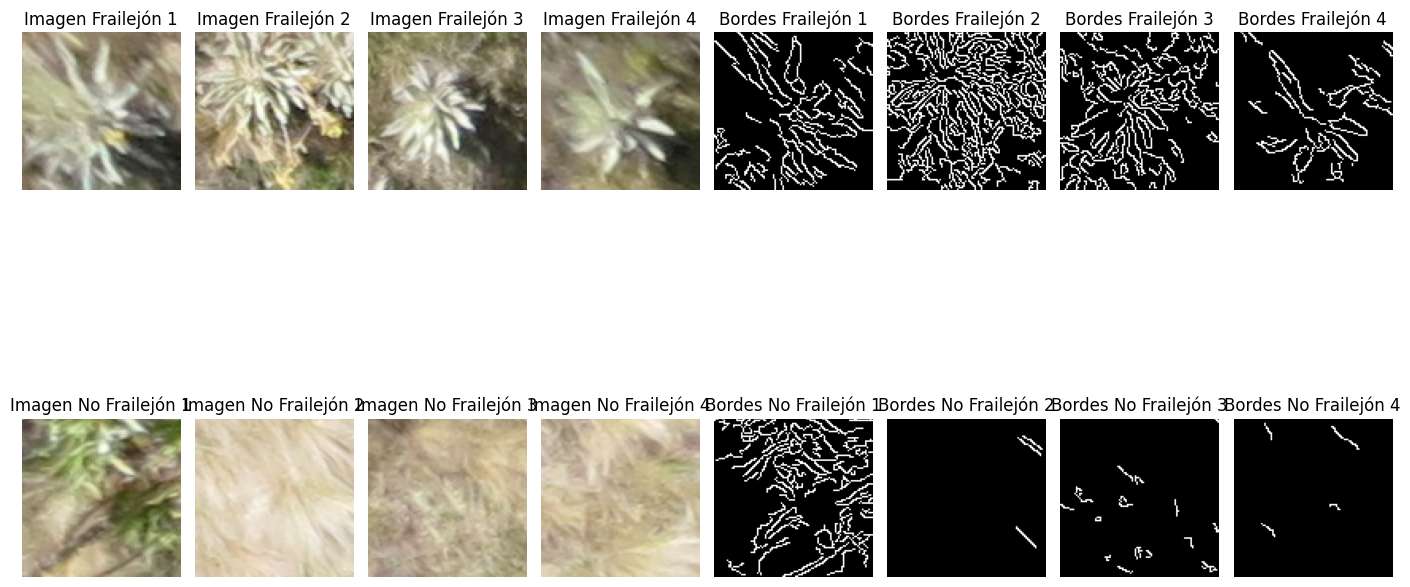

In [ ]:
# Función para realizar la detección de bordes usando Canny
def detectar_bordes(imagen):
    # Convertir la imagen de BGR a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar el detector de bordes de Canny
    bordes = cv2.Canny(imagen_gris, 100, 200)

    return bordes

# Crear el gráfico de las imágenes originales y los bordes detectados
plt.figure(figsize=(14, 10))

# Graficar las imágenes de Frailejón y sus bordes
for i in range(4):
    # Obtener bordes para la imagen de Frailejón
    bordes_frailejon = detectar_bordes(fraile_sample[i])

    # Mostrar imagen original de Frailejón
    plt.subplot(2, 8, i+1)
    plt.imshow(fraile_sample[i])
    plt.axis('off')
    plt.title(f"Imagen Frailejón {i+1}")

    # Mostrar bordes detectados de Frailejón
    plt.subplot(2, 8, i+5)
    plt.imshow(bordes_frailejon, cmap='gray')
    plt.axis('off')
    plt.title(f"Bordes Frailejón {i+1}")

# Graficar las imágenes de No Frailejón y sus bordes
for i in range(4):
    # Obtener bordes para la imagen de No Frailejón
    bordes_nofrailejon = detectar_bordes(nofraile_sample[i])

    # Mostrar imagen original de No Frailejón
    plt.subplot(2, 8, i+9)
    plt.imshow(nofraile_sample[i])
    plt.axis('off')
    plt.title(f"Imagen No Frailejón {i+1}")

    # Mostrar bordes detectados de No Frailejón
    plt.subplot(2, 8, i+13)
    plt.imshow(bordes_nofrailejon, cmap='gray')
    plt.axis('off')
    plt.title(f"Bordes No Frailejón {i+1}")

plt.tight_layout()
plt.show()

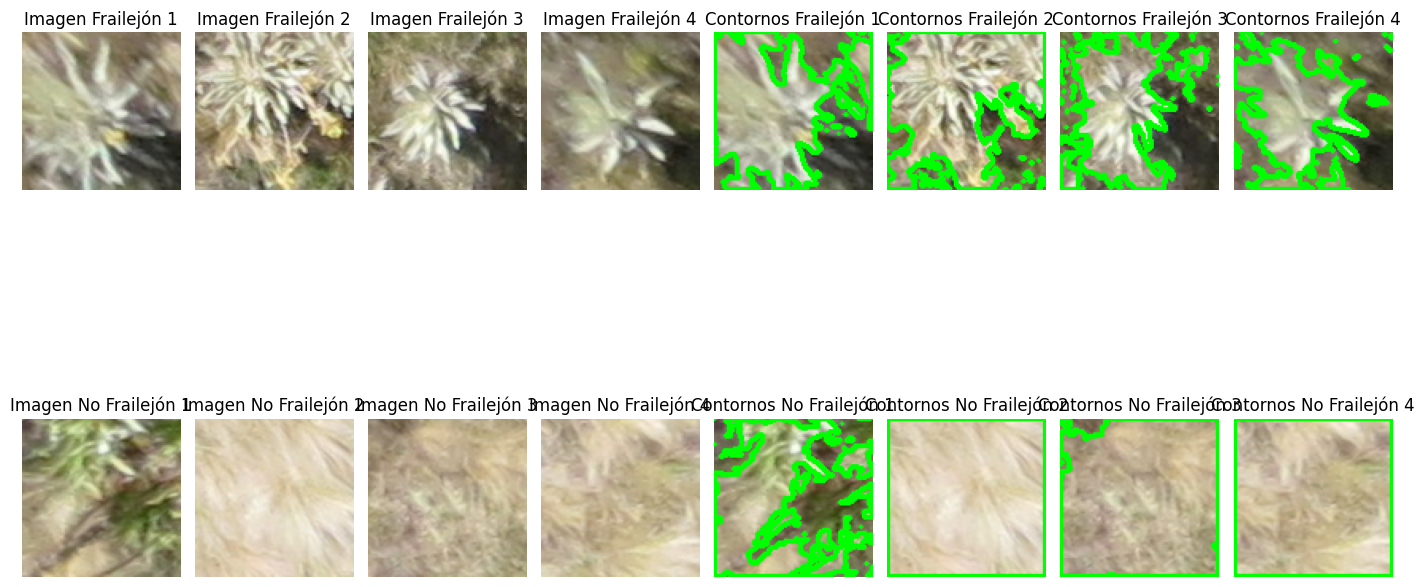

In [ ]:
# Función para detectar y dibujar contornos
def detectar_contornos(imagen):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar el umbral (thresholding) para obtener una imagen binaria
    _, umbral = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)

    # Detectar los contornos en la imagen binaria
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar los contornos sobre la imagen original
    imagen_con_contornos = imagen.copy()
    cv2.drawContours(imagen_con_contornos, contornos, -1, (0, 255, 0), 2)  # Dibujar contornos en verde

    return imagen_con_contornos, contornos

# Crear el gráfico de las imágenes originales y los contornos detectados
plt.figure(figsize=(14, 10))

# Graficar las imágenes de Frailejón y sus contornos
for i in range(4):
    # Obtener los contornos para la imagen de Frailejón
    imagen_contornos_frailejon, contornos_frailejon = detectar_contornos(fraile_sample[i])

    # Mostrar imagen original de Frailejón
    plt.subplot(2, 8, i+1)
    plt.imshow(fraile_sample[i])
    plt.axis('off')
    plt.title(f"Imagen Frailejón {i+1}")

    # Mostrar imagen con contornos detectados de Frailejón
    plt.subplot(2, 8, i+5)
    plt.imshow(imagen_contornos_frailejon)
    plt.axis('off')
    plt.title(f"Contornos Frailejón {i+1}")

# Graficar las imágenes de No Frailejón y sus contornos
for i in range(4):
    # Obtener los contornos para la imagen de No Frailejón
    imagen_contornos_nofrailejon, contornos_nofrailejon = detectar_contornos(nofraile_sample[i])

    # Mostrar imagen original de No Frailejón
    plt.subplot(2, 8, i+9)
    plt.imshow(nofraile_sample[i])
    plt.axis('off')
    plt.title(f"Imagen No Frailejón {i+1}")

    # Mostrar imagen con contornos detectados de No Frailejón
    plt.subplot(2, 8, i+13)
    plt.imshow(imagen_contornos_nofrailejon)
    plt.axis('off')
    plt.title(f"Contornos No Frailejón {i+1}")

plt.tight_layout()
plt.show()

### Importando los datos iniciales

In [ ]:

from ImportImagenes import *
from sklearn.model_selection import train_test_split
X,Y = import_imagenes()

CE_x, CV_x, CE_y, CV_y = train_test_split(X.T, Y.T, test_size = 0.3, random_state = 100)

CE_x = CE_x.T
CV_x = CV_x.T
CE_y = CE_y.T
CV_y = CV_y.T

n=CE_y.shape[1]
m=CV_y.shape[1]

print(CE_x.shape, CV_x.shape, CE_y.shape, CV_y.shape, n, m)

(14700, 175) (14700, 75) (1, 175) (1, 75) 175 75


### Red neuronal sencilla objetivo - Metric: "AUC" = 0.88

In [ ]:
# Fijar semillas para reproducibilidad
SEED = 42
tf.random.set_seed(SEED)  # Semilla para TensorFlow
np.random.seed(SEED)  # Semilla para NumPy
random.seed(SEED)  # Semilla para Python

# Definir la arquitectura de la red
modelo = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(CE_x.shape[0],)),  # Capa oculta con 64 neuronas y ReLU
    layers.Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide (para clasificación binaria)
])

# Compilar el modelo con AUC como métrica
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC(name="auc")])

# Entrenar la red neuronal
historial = modelo.fit(CE_x.T, CE_y.T, epochs=50, batch_size=32, validation_data=(CV_x.T, CV_y.T))

# Obtener el último valor de AUC en entrenamiento y validación
auc_train = historial.history['auc'][-1]
auc_val = historial.history['val_auc'][-1]

# Evaluar el modelo en el conjunto de validación
pérdida, auc_test = modelo.evaluate(CV_x.T, CV_y.T)

print(f"AUC en entrenamiento: {auc_train:.4f}")
print(f"AUC en validación (durante entrenamiento): {auc_val:.4f}")
print(f"AUC en validación (evaluado): {auc_test:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 451ms/step - auc: 0.5096 - loss: 4.8279 - val_auc: 0.3801 - val_loss: 0.7207
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - auc: 0.4420 - loss: 1.0576 - val_auc: 0.8677 - val_loss: 0.9878
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.7440 - loss: 0.9680 - val_auc: 0.4862 - val_loss: 0.9915
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.5741 - loss: 0.8078 - val_auc: 0.8648 - val_loss: 0.6536
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.7786 - loss: 0.5909 - val_auc: 0.7969 - val_loss: 0.5579
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - auc: 0.8068 - loss: 0.5684 - val_auc: 0.7812 - val_loss: 0.5740
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.8056 - loss: 0.5333 - val_auc: 0.8688 - val_loss: 0.5287
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.8844 - loss: 0.4823 - val_auc: 0.8452 - val_loss: 0.5089
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - auc: 0.8649 - loss: 0.4764 -

#### Se cumple el objetivo en la metrica de AUC, pasamos a la prueba cualitativa

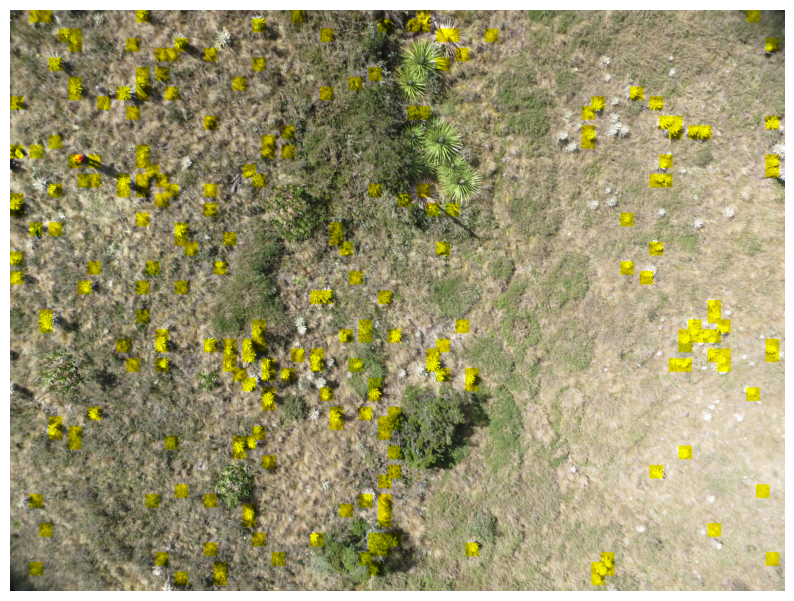

In [ ]:
# Convertir la imagen en un array de NumPy
x = np.array(img)
x2 = x.copy()  # Crear una copia para modificar

# Definir límites de iteración para recorrer la imagen en parches de 70x70 píxeles
ni = x.shape[0] - 50
mi = x.shape[1] - 50

f1, f2 = 0, 70

# Recorrer la imagen en bloques de 70x70 con pasos de 50 píxeles
for i in range(1, ni, 50):
    c1, c2 = 0, 70
    for j in range(1, mi, 50):
        # Extraer parche de la imagen
        subi = x[f1:f2, c1:c2, :]

        # Aplanar y normalizar
        subi2 = np.ndarray.flatten(subi).T / 255.0
        subi2 = subi2.reshape(1, -1)  # Ajustar dimensión para la red neuronal

        # Predecir con el modelo
        pred_P = modelo.predict(subi2, verbose=0)[0][0]  # Predicción de la NN

        # Si la predicción indica que es un frailejón (umbral 0.5)
        if pred_P >= 0.5:
            x2[f1:f2, c1:c2, 2] = 0  # Resalta en rojo

        # Actualizar índices para la siguiente iteración
        c1 += 50
        c2 += 50

    f1 += 50
    f2 += 50

# Mostrar la imagen procesada
plt.figure(figsize=(10, 10))
plt.imshow(x2)
plt.axis("off")
plt.show()


### Red neuronal Multi-capa objetivo  AUC--> 0.95

#### Dado que con los datos en bruto no fue posible llegar a la metrica objetivo procedemos a hacer un enriquecimiento de la informacion

In [ ]:

# Reconvertimos CE_x a su forma original de imágenes
n_samples = CE_x.shape[1]
img_height, img_width, img_channels = 70, 70, 3
CE_x_images = CE_x.T.reshape(n_samples, img_height, img_width, img_channels)

# Configurar el generador de imágenes para Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Aumentamos los datos
augmented_images = []
augmented_labels = []
for i in range(n_samples):
    img = CE_x_images[i].reshape((1,) + CE_x_images[i].shape)  # Agregar dimensión batch
    label = CE_y[:, i]  # Obtener la etiqueta correspondiente

    count = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(label)
        count += 1
        if count >= 3:  # Generar 3 imágenes adicionales por imagen original
            break

# Convertimos a arrays numpy
augmented_images = np.array(augmented_images).reshape(-1, img_height * img_width * img_channels).T
augmented_labels = np.array(augmented_labels).T

# Combinamos los datos aumentados con los originales
CE_x_aug = np.hstack((CE_x, augmented_images))
CE_y_aug = np.hstack((CE_y, augmented_labels))

print("Nueva forma de CE_x tras data augmentation:", CE_x_aug.shape)
print("Nueva forma de CE_y tras data augmentation:", CE_y_aug.shape)


Nueva forma de CE_x tras data augmentation: (14700, 700)
Nueva forma de CE_y tras data augmentation: (1, 700)


#### Para tomar la red multicapa que mejor se ajuste corremos una grilla de parametros con los datos aumentados

In [ ]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import ParameterGrid
import time

# Fijar semillas para reproducibilidad
SEED = 42
tf.random.set_seed(SEED)  # Semilla para TensorFlow
np.random.seed(SEED)  # Semilla para NumPy
random.seed(SEED)  # Semilla para Python

# Establecer semilla para el generador de números aleatorios de TensorFlow
def establecer_semilla():
    # Asegurar que la semilla esté configurada correctamente para los valores deterministas
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    # Si estamos usando GPU, también podemos configurar la semilla en los generadores de GPU (CUDA)
    # Para un control adicional sobre la ejecución determinista
    from tensorflow.compat.v1 import set_random_seed
    set_random_seed(SEED)

# Función para crear y entrenar el modelo con 3 capas ocultas
def crear_y_entrenar_modelo(neuronas1, neuronas2, neuronas3, learning_rate, batch_size, epochs):
    # Establecer la semilla antes de crear el modelo
    establecer_semilla()

    # Definir la arquitectura de la red con 3 capas ocultas
    modelo = keras.Sequential([
        layers.Dense(neuronas1, activation='relu', input_shape=(CE_x.shape[0],)),  # Primera capa oculta
        layers.Dense(neuronas2, activation='relu'),  # Segunda capa oculta
        layers.Dense(neuronas3, activation='relu'),  # Tercera capa oculta
        layers.Dense(1, activation='sigmoid')  # Capa de salida
    ])

    # Compilar el modelo
    modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                   loss='binary_crossentropy',
                   metrics=[keras.metrics.AUC(name="auc")])

    # Entrenar el modelo
    historial = modelo.fit(CE_x_aug.T, CE_y_aug.T, epochs=epochs, batch_size=batch_size, validation_data=(CV_x.T, CV_y.T), verbose=0)

    # Obtener el AUC final en entrenamiento y validación
    auc_train = historial.history['auc'][-1]
    auc_val = historial.history['val_auc'][-1]

    return auc_train, auc_val  # Retornamos el AUC de entrenamiento y validación

# Definir el espacio de búsqueda de hiperparámetros
parametros = {
    'neuronas1': [64, 128, 256],
    'neuronas2': [32, 64, 128],
    'neuronas3': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]  # Puedes ajustar el número de épocas si es necesario
}

# Crear la malla de combinaciones de hiperparámetros
combinaciones = list(ParameterGrid(parametros))

# Reducir la cantidad de combinaciones probadas para acelerar la búsqueda (usamos una muestra aleatoria)
combinaciones_a_probar = random.sample(combinaciones, min(10, len(combinaciones)))  # Seleccionar 10 combinaciones aleatorias

# Inicializar variables para la mejor combinación
mejor_auc = 0
mejor_config = None

# Búsqueda aleatoria
start_time = time.time()

# Probar las combinaciones aleatorias seleccionadas
for i, config in enumerate(combinaciones_a_probar):
    print(f"Evaluando combinación {i+1}/{len(combinaciones_a_probar)}: {config}")

    auc_train, auc_val = crear_y_entrenar_modelo(
        neuronas1=config['neuronas1'],
        neuronas2=config['neuronas2'],
        neuronas3=config['neuronas3'],
        learning_rate=config['learning_rate'],
        batch_size=config['batch_size'],
        epochs=config['epochs']
    )

    print(f"AUC en Entrenamiento para esta configuración: {auc_train:.4f}")
    print(f"AUC en Validación para esta configuración: {auc_val:.4f}")

    # Si encontramos una mejor configuración, guardamos el resultado
    if auc_val > mejor_auc:
        mejor_auc = auc_val
        mejor_config = config

# Mostrar la mejor configuración y el AUC correspondiente
end_time = time.time()
tiempo_total = end_time - start_time

print("\n🔥 Mejor configuración encontrada:", mejor_config)
print(f"✅ Mejor AUC en Validación: {mejor_auc:.4f}")
print(f"⏱ Tiempo total de la búsqueda: {tiempo_total:.2f} segundos")


Evaluando combinación 1/10: {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.001, 'neuronas1': 64, 'neuronas2': 64, 'neuronas3': 16}
AUC en Entrenamiento para esta configuración: 0.8177
AUC en Validación para esta configuración: 0.8979
Evaluando combinación 2/10: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.0001, 'neuronas1': 64, 'neuronas2': 64, 'neuronas3': 16}
AUC en Entrenamiento para esta configuración: 0.8003
AUC en Validación para esta configuración: 0.8895
Evaluando combinación 3/10: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.001, 'neuronas1': 128, 'neuronas2': 64, 'neuronas3': 16}
AUC en Entrenamiento para esta configuración: 0.7899
AUC en Validación para esta configuración: 0.8859
Evaluando combinación 4/10: {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.0001, 'neuronas1': 64, 'neuronas2': 32, 'neuronas3': 32}
AUC en Entrenamiento para esta configuración: 0.7768
AUC en Validación para esta configuración: 0.8866
Evaluando combinación 5/10: {'batch_size'

Vemos que aun con el aumentado de los datos y la busqueda de los mejores parametros la red neuronal multicapa no supera el 0,9 en AUC, proseguimos a emplear redes convolusionales en busqueda de mejores resultados.

### Red neuronal convolucional objetivo AUC --> 0.95





In [ ]:
import h5py
import numpy as np
import urllib.request

def importar_imagenes_CNN():
    # 🔹 Descargar dataset
    dataset_url = "https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/data_F"
    dataset_path = "data_F"
    urllib.request.urlretrieve(dataset_url, dataset_path)

    # 🔹 Cargar archivo HDF5
    with h5py.File(dataset_path, 'r') as FF:
        fraile = np.array(FF.get('Frailejon'))
        nofraile = np.array(FF.get('NoFrailejon'))

    # 🔹 Obtener cantidad de imágenes por clase
    num_fraile = fraile.shape[0]
    num_nofraile = nofraile.shape[0]

    # 🔹 Preprocesamiento: recortes de imágenes
    fraile2, nofraile2 = [], []
    posiciones = [
        (0, 0, 70, 70),   # Esquina superior izquierda
        (30, 0, 100, 70), # Centro arriba
        (30, 30, 100, 100), # Centro
        (0, 30, 70, 100),  # Centro izquierda
        (15, 15, 85, 85)   # Recorte más grande
    ]

    def extraer_recortes(imagenes, destino):
        """ Extrae recortes de las imágenes según las posiciones definidas """
        for img in imagenes:
            for (r1, c1, r2, c2) in posiciones:
                destino.append(img[r1:r2, c1:c2, :])

    extraer_recortes(fraile, fraile2)
    extraer_recortes(nofraile, nofraile2)

    # 🔹 Convertir a numpy arrays y normalizar
    fraile2 = np.asarray(fraile2, dtype=np.float32) / 255.0
    nofraile2 = np.asarray(nofraile2, dtype=np.float32) / 255.0

    # 🔹 Crear datos de entrada y etiquetas
    X = np.concatenate((fraile2, nofraile2), axis=0)
    Y = np.array([1] * len(fraile2) + [0] * len(nofraile2))  # 1 = Frailejón, 0 = No Frailejón

    # 🔹 Mezclar aleatoriamente los datos
    indices = np.random.permutation(X.shape[0])
    X, Y = X[indices], Y[indices]

    return X, Y


In [ ]:
# Importar y dividir en conjunto completo de datos
X, Y = importar_imagenes_CNN()

# Dividir en entrenamiento (70%) y validación (30%)
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

# Verificar formas de los conjuntos
print("📌 CE_x (Train) Shape:", CE_x.shape)
print("📌 CV_x (Validation) Shape:", CV_x.shape)
print("📌 CE_y (Train Labels) Shape:", CE_y.shape)
print("📌 CV_y (Validation Labels) Shape:", CV_y.shape)

📌 CE_x (Train) Shape: (175, 70, 70, 3)
📌 CV_x (Validation) Shape: (75, 70, 70, 3)
📌 CE_y (Train Labels) Shape: (175,)
📌 CV_y (Validation Labels) Shape: (75,)


In [ ]:

# Fijar semilla para reproducibilidad
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Forzar operaciones deterministas en TensorFlow
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Cargar datos
X, Y = importar_imagenes_CNN()

# Dividir en entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=SEED, shuffle=False)

# 🔄 Data Augmentation (sin afectar reproducibilidad)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear generador de datos para entrenamiento
train_generator = datagen.flow(CE_x, CE_y, batch_size=32, seed=SEED, shuffle=False)

# 🧠 Definir la arquitectura de la CNN

modelo = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid', strides=1, input_shape=(CE_x.shape[1], CE_x.shape[2], CE_x.shape[3])),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='valid', strides=1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='valid', strides=1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


# 🏆 Compilar el modelo con AUC como métrica
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name="auc")])

# 🛑 Early Stopping basado en AUC
early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# 🚀 Entrenar el modelo con Data Augmentation y AUC como métrica
modelo.fit(train_generator, epochs=50, validation_data=(CV_x, CV_y), callbacks=[early_stopping])

# 📊 Evaluar en el conjunto de validación
pérdida, auc_val = modelo.evaluate(CV_x, CV_y)
print(f"\n✅ AUC en validación: {auc_val:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 740ms/step - auc: 0.5477 - loss: 0.6945 - val_auc: 0.3728 - val_loss: 0.6863
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - auc: 0.3751 - loss: 0.6961 - val_auc: 0.6817 - val_loss: 0.6697
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - auc: 0.7041 - loss: 0.6652 - val_auc: 0.7220 - val_loss: 0.6715
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - auc: 0.6383 - loss: 0.6396 - val_auc: 0.8517 - val_loss: 0.5902
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - auc: 0.7759 - loss: 0.5958 - val_auc: 0.7929 - val_loss: 0.5537
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - auc: 0.7446 - loss: 0.5550 - val_auc: 0.8427 - val_loss: 0.4729
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - auc: 0.8207 - loss: 0.4963 - val_auc: 0.9073 - val_loss: 0.4735
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - auc: 0.8090 - loss: 0.5543 - val_auc: 0.8586 - val_loss: 0.4844
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - auc: 0.8359 - loss: 0.4773 - val_auc: 0

La red neuronal convolucional aumenta sustancialmente la metrica en validación, cumpliendo el objetivo

### Red neuronal convolucional con tranferencia VGG-16 --> 0.99




#### Se define una nueva importación ya que la red vgg-16 trabaja en principio con imagenes de tamaño (224,224)

In [ ]:
import h5py
import numpy as np
import urllib.request
import tensorflow as tf

def importar_imagenes_CNN_VGG16():
    # 🔹 Descargar dataset
    dataset_url = "https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/data_F"
    dataset_path = "data_F"
    urllib.request.urlretrieve(dataset_url, dataset_path)

    # 🔹 Cargar archivo HDF5
    with h5py.File(dataset_path, 'r') as FF:
        fraile = np.array(FF.get('Frailejon'))
        nofraile = np.array(FF.get('NoFrailejon'))

    # 🔹 Obtener cantidad de imágenes por clase
    num_fraile = fraile.shape[0]
    num_nofraile = nofraile.shape[0]

    # 🔹 Preprocesamiento: recortes de imágenes
    fraile2, nofraile2 = [], []
    posiciones = [
        (0, 0, 70, 70),   # Esquina superior izquierda
        (30, 0, 100, 70), # Centro arriba
        (30, 30, 100, 100), # Centro
        (0, 30, 70, 100),  # Centro izquierda
        (15, 15, 85, 85)   # Recorte más grande
    ]

    def extraer_recortes(imagenes, destino):
        """ Extrae recortes de las imágenes según las posiciones definidas """
        for img in imagenes:
            for (r1, c1, r2, c2) in posiciones:
                recorte = img[r1:r2, c1:c2, :]
                # 🔄 Redimensionar cada recorte a 224x224 (VGG16)
                recorte_resized = tf.image.resize(recorte, (224, 224), method=tf.image.ResizeMethod.BICUBIC).numpy()
                destino.append(recorte_resized)

    extraer_recortes(fraile, fraile2)
    extraer_recortes(nofraile, nofraile2)

    # 🔹 Convertir a numpy arrays y normalizar
    fraile2 = np.asarray(fraile2, dtype=np.float32) / 255.0
    nofraile2 = np.asarray(nofraile2, dtype=np.float32) / 255.0

    # 🔹 Crear datos de entrada y etiquetas
    X = np.concatenate((fraile2, nofraile2), axis=0)
    Y = np.array([1] * len(fraile2) + [0] * len(nofraile2))  # 1 = Frailejón, 0 = No Frailejón

    # 🔹 Mezclar aleatoriamente los datos
    indices = np.random.permutation(X.shape[0])
    X, Y = X[indices], Y[indices]

    return X, Y

#### Vemos el tamaño de los datos

In [ ]:
# Importar y dividir en conjunto completo de datos
X, Y = importar_imagenes_CNN_VGG16()

# Dividir en entrenamiento (70%) y validación (30%)
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

# Verificar formas de los conjuntos
print("📌 CE_x (Train) Shape:", CE_x.shape)
print("📌 CV_x (Validation) Shape:", CV_x.shape)
print("📌 CE_y (Train Labels) Shape:", CE_y.shape)
print("📌 CV_y (Validation Labels) Shape:", CV_y.shape)

📌 CE_x (Train) Shape: (175, 224, 224, 3)
📌 CV_x (Validation) Shape: (75, 224, 224, 3)
📌 CE_y (Train Labels) Shape: (175,)
📌 CV_y (Validation Labels) Shape: (75,)


#### Probamos la red neuronal con la nueva funcion de importacion de imagen

In [ ]:

# 🔒 Fijar semilla para reproducibilidad
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# 📥 Cargar datos
X, Y = importar_imagenes_CNN_VGG16()  # Asegúrate de que las imágenes tienen forma (altura, ancho, canales)

# 🏗️ Dividir en entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=SEED, shuffle=False)

# 🔄 Data Augmentation con redimensionamiento de imágenes
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(CE_x, CE_y, batch_size=32, seed=SEED)

# 🔥 Cargar VGG16 preentrenada (sin capas completamente conectadas)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(CE_x.shape[1], CE_x.shape[2], CE_x.shape[3]))

# Congelar las capas convolucionales de VGG-16 (evita reentrenamiento innecesario)
base_model.trainable = False

# 🧠 Construir la red neuronal
modelo = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# 🏆 Compilar el modelo con AUC como métrica
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name="auc")])

# 🛑 Early Stopping basado en AUC
early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# 🚀 Entrenar el modelo con Data Augmentation y VGG-16
modelo.fit(train_generator, epochs=100, validation_data=(CV_x, CV_y), callbacks=[early_stopping])

# 📊 Evaluar en el conjunto de validación
pérdida, auc_val = modelo.evaluate(CV_x, CV_y)
print(f"\n✅ AUC en validación: {auc_val:.4f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - auc: 0.5289 - loss: 1.5146 - val_auc: 0.7805 - val_loss: 1.0719
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step - auc: 0.6472 - loss: 1.2102 - val_auc: 0.7922 - val_loss: 1.2277
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step - auc: 0.6626 - loss: 1.1842 - val_auc: 0.7918 - val_loss: 1.0356
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 581ms/step - auc: 0.7453 - loss: 0.8249 - val_auc: 0.8209 - val_loss: 0.5337
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - auc: 0.7320 - loss: 0.6352 - val_auc: 0.8394 - val_loss: 0.5465
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - auc: 0.8000 - loss: 0.5735 - val_auc: 0.8129 - val_loss: 0.5863
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - auc: 0.7882 - loss: 0.5813 - val_auc: 0.8252 - val_loss: 0.5409
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - auc: 0.8274 - loss: 0.5315 - val_auc: 0.8318 - val_loss: 0.5038
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - auc: 0.8396 -

#### Probamos la red neuronal con el antiguo array de imagenes

In [ ]:


# 🔒 Fijar semilla para reproducibilidad
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# 📥 Cargar datos
X, Y = importar_imagenes_CNN()  # Asegúrate de que las imágenes tienen forma (altura, ancho, canales)

# 🏗️ Dividir en entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=SEED, shuffle=False)

# 🔄 Data Augmentation con redimensionamiento de imágenes
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(CE_x, CE_y, batch_size=32, seed=SEED)

# 🔥 Cargar VGG16 preentrenada (sin capas completamente conectadas)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(CE_x.shape[1], CE_x.shape[2], CE_x.shape[3]))

# Congelar las capas convolucionales de VGG-16 (evita reentrenamiento innecesario)
base_model.trainable = False

# 🧠 Construir la red neuronal
modelo = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# 🏆 Compilar el modelo con AUC como métrica
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name="auc")])

# 🛑 Early Stopping basado en AUC
early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# 🚀 Entrenar el modelo con Data Augmentation y VGG-16
modelo.fit(train_generator, epochs=100, validation_data=(CV_x, CV_y), callbacks=[early_stopping])

# 📊 Evaluar en el conjunto de validación
pérdida, auc_val = modelo.evaluate(CV_x, CV_y)
print(f"\n✅ AUC en validación: {auc_val:.4f}")

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 598ms/step - auc: 0.6528 - loss: 0.6536 - val_auc: 0.8645 - val_loss: 0.4828
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - auc: 0.8472 - loss: 0.5228 - val_auc: 0.8943 - val_loss: 0.4260
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - auc: 0.8964 - loss: 0.4232 - val_auc: 0.9062 - val_loss: 0.3988
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - auc: 0.9599 - loss: 0.3099 - val_auc: 0.9204 - val_loss: 0.3518
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - auc: 0.9176 - loss: 0.3526 - val_auc: 0.9320 - val_loss: 0.3507
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - auc: 0.9590 - loss: 0.2526 - val_auc: 0.9386 - val_loss: 0.3237
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - auc: 0.9693 - loss: 0.2288 - val_auc: 0.9426 - val_loss: 0.2981
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - auc: 0.9604 - loss: 0.2636 - val_auc: 0.9506 - val_loss: 0.3180
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - auc: 0.9834 - loss

#### Se denota que el mejor resultado se encuentra con el array original, quiza al redimensionar las imagenes se distorsiona la forma y se pierde información, procedemos a la evaluacion cualitativa

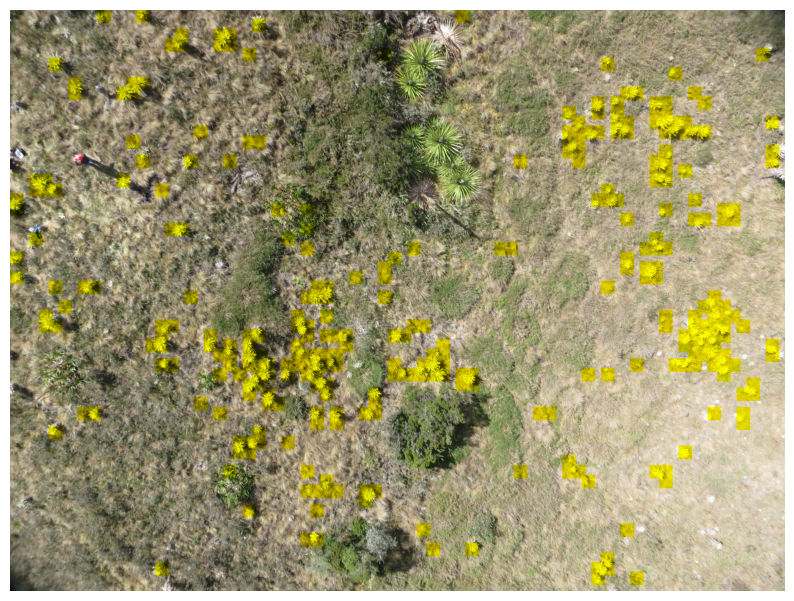

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Convertir la imagen en un array de NumPy
x = np.array(img)
x2 = x.copy()  # Crear una copia para modificar

# Definir límites de iteración para recorrer la imagen en parches de 70x70 píxeles
ni = x.shape[0] - 50
mi = x.shape[1] - 50

f1, f2 = 0, 70

# Recorrer la imagen en bloques de 70x70 con pasos de 50 píxeles
for i in range(1, ni, 50):
    c1, c2 = 0, 70
    for j in range(1, mi, 50):
        # Extraer parche de la imagen
        subi = x[f1:f2, c1:c2, :]

        # 🔄 Redimensionar el parche a 224x224 para VGG16
        subi_resized = cv2.resize(subi, (70, 70))

        # Normalizar (VGG16 usa imágenes en el rango [0,1] o preprocesadas con ImageNet)
        subi_resized = subi_resized / 255.0

        # Ajustar la forma para la entrada del modelo (1, 224, 224, 3)
        subi_resized = np.expand_dims(subi_resized, axis=0)

        # Predecir con el modelo
        pred_P = modelo.predict(subi_resized, verbose=0)[0][0]  # Predicción de la CNN

        # Si la predicción indica que es un frailejón (umbral 0.5)
        if pred_P >= 0.5:
            x2[f1:f2, c1:c2, 2] = 0  # Resalta en rojo

        # Actualizar índices para la siguiente iteración
        c1 += 50
        c2 += 50

    f1 += 50
    f2 += 50

# Mostrar la imagen procesada
plt.figure(figsize=(10, 10))
plt.imshow(x2)
plt.axis("off")
plt.show()


Vemos una clasificacion de frailejones mucho mejor comparado con anteriores redes, atrapando a la mayoria de frailejones, sin embargo, aun vemos que varios clasificados como frailejones no lo son

### Red neuronal convolucional con tranferencia VGG-16 y ajuste de hiperparámetros (bono por uso de Optuna) --> 0.99

In [ ]:

# Fijar semilla para reproducibilidad
SEED = 44
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Cargar datos
X, Y = importar_imagenes_CNN()

# Dividir en entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=SEED, shuffle=False)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(CE_x, CE_y, batch_size=32, seed=SEED)

# Definir función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    units = trial.suggest_int('units', 64, 512, step=64)  # Neuronas en capa densa
    dropout_rate = trial.suggest_float('dropout', 0.3, 0.7, step=0.1)  # Dropout
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Búsqueda del learning rate

    # Cargar VGG16 sin la parte fully connected
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(CE_x.shape[1], CE_x.shape[2], CE_x.shape[3]))
    base_model.trainable = False  # Congelamos las capas convolucionales

    # Construir el modelo
    modelo = keras.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])

    # Diccionario de optimizadores
    optimizer_dict = {
        'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
        'sgd': tf.keras.optimizers.SGD(learning_rate=learning_rate),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    }
    optimizer = optimizer_dict[optimizer_name]

    # Compilar el modelo
    modelo.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name="auc")])

    # Early Stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

    # Entrenar el modelo
    modelo.fit(train_generator, epochs=50, validation_data=(CV_x, CV_y), callbacks=[early_stopping], verbose=0)

    # Evaluar en validación
    _, auc_val = modelo.evaluate(CV_x, CV_y, verbose=0)

    return auc_val  # Optuna maximiza el AUC

#  Ejecutar la optimización con Optuna
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))  # Queremos maximizar el AUC
study.optimize(objective, n_trials=50)  # Aumentamos los ensayos a 50

#  Mostrar mejores hiperparámetros
print(f"\n🎯 Mejores hiperparámetros encontrados: {study.best_params}")
print(f"✅ Mejor AUC obtenido: {study.best_value:.4f}")


[I 2025-03-20 16:57:32,754] A new study created in memory with name: no-name-89a2b669-d1d2-4390-9400-c5c6c35e20d3
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
[I 2025-03-20 16:57:42,495] Trial 0 finished with value: 1.0 and parameters: {'units': 448, 'dropout': 0.3, 'optimizer': 'adam', 'learning_rate': 0.0006725353888169592}. Best is trial 0 with value: 1.0.
[I 2025-03-20 16:57:56,027] Trial 1 finished with value: 1.0 and parameters: {'units': 256, 'dropout': 0.5, 'optimizer': 'rmsprop', 'learning_rate': 0.00023434911987514097}. Best is trial 0 with value: 1.0.
[I 2025-03-20 16:58:16,095] Trial 2 finished with value: 0.9662063717842102 and parameters: {'units': 25


🎯 Mejores hiperparámetros encontrados: {'units': 384, 'dropout': 0.4, 'optimizer': 'adam', 'learning_rate': 0.004183979572176086}
✅ Mejor AUC obtenido: 1.0000


Probamos la red neuronal con los mejores parametros

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 🔒 Fijar semilla para reproducibilidad
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# 📥 Cargar datos
X, Y = importar_imagenes_CNN()  # Asegúrate de que las imágenes tienen forma (altura, ancho, canales)

# 🏗️ Dividir en entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=SEED)

# 🔄 Data Augmentation con redimensionamiento de imágenes
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Redimensionar las imágenes al tamaño adecuado para VGG16 (224x224)
train_generator = datagen.flow(CE_x, CE_y, batch_size=32, seed=SEED)

# 🔥 Cargar VGG16 preentrenada (sin capas completamente conectadas)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(CE_x.shape[1], CE_x.shape[2], CE_x.shape[3]))

# Congelar las capas convolucionales de VGG-16 (evita reentrenamiento innecesario)
base_model.trainable = False

# 🧠 Construir la red neuronal con los mejores hiperparámetros encontrados
modeloF = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(384, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# 🏆 Compilar el modelo con AUC como métrica y optimizador 'adam' con learning_rate = 0.0023206
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0023206039102688864)

modeloF.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name="auc")])

# 🛑 Early Stopping basado en AUC
early_stopping = keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# 🚀 Entrenar el modelo con Data Augmentation y VGG-16
modeloF.fit(train_generator, epochs=50, validation_data=(CV_x, CV_y), callbacks=[early_stopping])

# 📊 Evaluar en el conjunto de validación
pérdida, auc_val = modeloF.evaluate(CV_x, CV_y)
print(f"\n✅ AUC en validación: {auc_val:.4f}")


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - auc: 0.5436 - loss: 1.2699 - val_auc: 0.8842 - val_loss: 0.4898
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - auc: 0.9076 - loss: 0.4415 - val_auc: 0.8996 - val_loss: 0.5972
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.9510 - loss: 0.4022 - val_auc: 0.9260 - val_loss: 0.4307
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - auc: 0.9259 - loss: 0.5088 - val_auc: 0.9494 - val_loss: 0.2946
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.9681 - loss: 0.2663 - val_auc: 0.9674 - val_loss: 0.2463
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.9732 - loss: 0.2273 - val_auc: 0.9751 - val_loss: 0.2140
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.9629 - loss: 0.2307 - val_auc: 0.9817 - val_loss: 0.1830
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - auc: 0.9873 - loss: 0.1619 - val_auc: 0.9857 - val_loss: 0.1672
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - auc: 0.9918 - loss: 0.1567 -

Procedemos a la prueba cualitativa

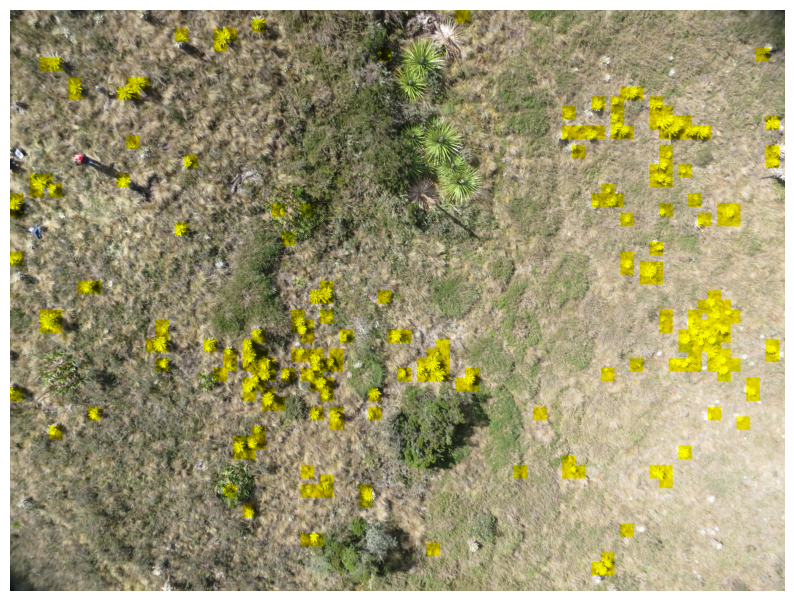

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Convertir la imagen en un array de NumPy
x = np.array(img)
x2 = x.copy()  # Crear una copia para modificar

# Definir límites de iteración para recorrer la imagen en parches de 70x70 píxeles
ni = x.shape[0] - 50
mi = x.shape[1] - 50

f1, f2 = 0, 70

# Recorrer la imagen en bloques de 70x70 con pasos de 50 píxeles
for i in range(1, ni, 50):
    c1, c2 = 0, 70
    for j in range(1, mi, 50):
        # Extraer parche de la imagen
        subi = x[f1:f2, c1:c2, :]

        # 🔄 Redimensionar el parche a 224x224 para VGG16
        subi_resized = cv2.resize(subi, (70, 70))

        # Normalizar (VGG16 usa imágenes en el rango [0,1] o preprocesadas con ImageNet)
        subi_resized = subi_resized / 255.0

        # Ajustar la forma para la entrada del modelo (1, 224, 224, 3)
        subi_resized = np.expand_dims(subi_resized, axis=0)

        # Predecir con el modelo
        pred_P = modeloF.predict(subi_resized, verbose=0)[0][0]  # Predicción de la CNN

        # Si la predicción indica que es un frailejón (umbral 0.5)
        if pred_P >= 0.5:
            x2[f1:f2, c1:c2, 2] = 0  # Resalta en rojo

        # Actualizar índices para la siguiente iteración
        c1 += 50
        c2 += 50

    f1 += 50
    f2 += 50

# Mostrar la imagen procesada
plt.figure(figsize=(10, 10))
plt.imshow(x2)
plt.axis("off")
plt.show()

###¿Qué puede observar sobre el desempeño de los diferentes modelos? Argumente cuál es el mejor modelo para poner en producción.

Ver informe en PDF

###Investigue otra red pre-entrenada dsitinta a la VGG-16 e implemente el aprendizaje por transferencia para la deteccion de frailejones. Argumente por qué su justifica el aprendizaje por transferencia con base en el modelo pre-entrenado de su elección (cómo se relacionan la tarea base y la segunda tarea objetivo).


### MobileNetV2

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 🔒 Fijar semilla para reproducibilidad
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# 📥 Cargar datos
X, Y = importar_imagenes_CNN()


# 🏗️ Dividir en entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X, Y, test_size=0.3, random_state=SEED, stratify=Y)

# 🔄 Configurar Data Augmentation con semilla
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Aplicar Data Augmentation con semilla
train_generator = datagen.flow(CE_x, CE_y, batch_size=32, seed=SEED)

# 🔥 Cargar MobileNetV2 preentrenado
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(70, 70, 3))
base_model.trainable = True

# 🏗️ Construir el modelo
modeloF = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# 🔧 Compilar con menor learning rate
modeloF.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=[tf.keras.metrics.AUC(name="auc")])

# 🚀 Entrenar usando el generador de imágenes
modeloF.fit(train_generator, epochs=30, validation_data=(CV_x, CV_y), steps_per_epoch=len(CE_x) // 32)

# 📊 Evaluar el modelo
pérdida, auc_val = modeloF.evaluate(CV_x, CV_y)
print(f"\n✅ AUC en validación: {auc_val:.4f}")


<ipython-input-11-d5e51daad584>:41: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(70, 70, 3))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 506ms/step - auc: 0.4759 - loss: 0.7983 - val_auc: 0.4146 - val_loss: 0.8745
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.6039 - loss: 0.8177 - val_auc: 0.3831 - val_loss: 0.8306
Epoch 3/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - auc: 0.4854 - loss: 0.8185

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - auc: 0.6057 - loss: 0.7129 - val_auc: 0.3860 - val_loss: 0.7537
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - auc: 0.6039 - loss: 0.6984 - val_auc: 0.4109 - val_loss: 0.7425
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - auc: 0.7254 - loss: 0.6220 - val_auc: 0.6496 - val_loss: 0.7161
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - auc: 1.0000 - loss: 0.3347 - val_auc: 0.6859 - val_loss: 0.7348
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - auc: 0.7563 - loss: 0.5681 - val_auc: 0.7797 - val_loss: 0.8830
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - auc: 0.8889 - loss: 0.4074 - val_auc: 0.7907 - val_loss: 0.9270
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - auc: 0.8278 - loss: 0.5032 - val_auc: 0.8138 - val_loss: 1.0914
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.8591 - loss: 0.5046 - val_auc: 0.8281 - val_loss: 1.1024
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - auc: 0.8921 - loss: 0.4338 - val_

### Cálculo de densidad poblacional por grupos de Frilejones

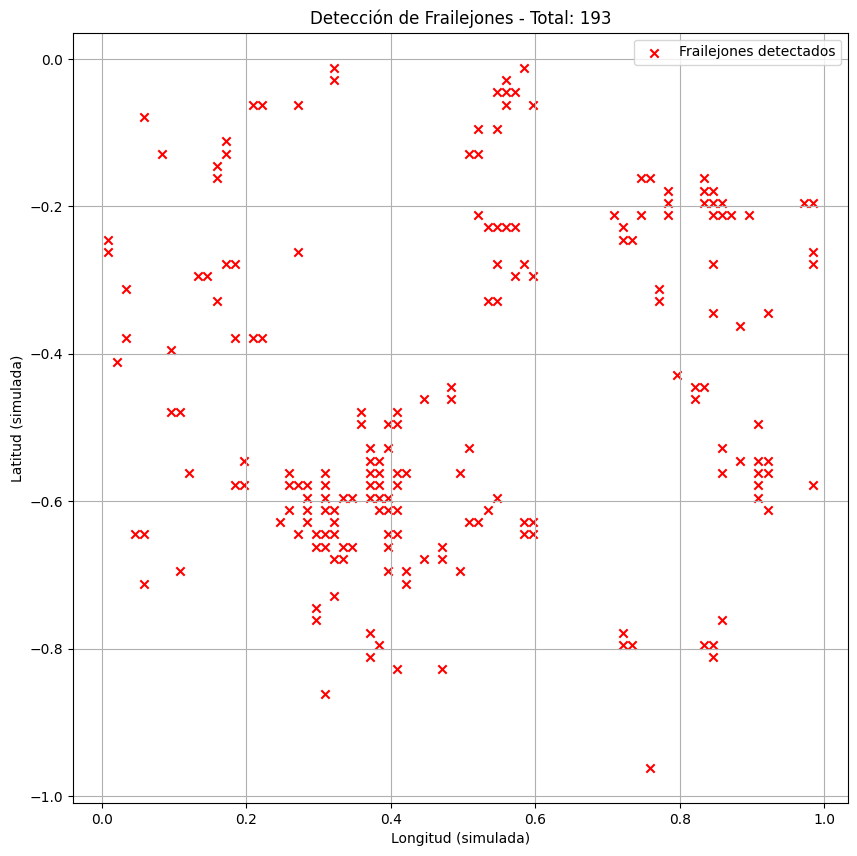

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Convertir la imagen en un array de NumPy
x = np.array(img)

# Definir límites de iteración para recorrer la imagen en parches de 70x70 píxeles
ni = x.shape[0] - 50
mi = x.shape[1] - 50

f1, f2 = 0, 70

# Lista para almacenar coordenadas de frailejones detectados
frailejones_coords = []

# Recorrer la imagen en bloques de 70x70 con pasos de 50 píxeles
for i in range(1, ni, 50):
    c1, c2 = 0, 70
    for j in range(1, mi, 50):
        # Extraer parche de la imagen
        subi = x[f1:f2, c1:c2, :]

        # 🔄 Redimensionar el parche a 70x70
        subi_resized = cv2.resize(subi, (70, 70))


        subi_resized = subi_resized / 255.0

        # Ajustar la forma para la entrada del modelo (1, 70, 70, 3)
        subi_resized = np.expand_dims(subi_resized, axis=0)

        # Predecir con el modelo
        pred_P = modeloF.predict(subi_resized, verbose=0)[0][0]  # Predicción de la CNN

        # Si la predicción indica que es un frailejón (umbral 0.5)
        if pred_P >= 0.5:
            # Guardar la ubicación del frailejón en términos de píxeles
            frailejones_coords.append((c1 + 35, f1 + 35))  # Punto central del parche

        # Actualizar índices para la siguiente iteración
        c1 += 50
        c2 += 50

    f1 += 50
    f2 += 50

# Convertir lista a array de NumPy
frailejones_coords = np.array(frailejones_coords)

# 📌 Simular coordenadas de latitud y longitud (normalizadas de 0 a 1)
latitudes = frailejones_coords[:, 1] / x.shape[0]  # Normalizar Y
longitudes = frailejones_coords[:, 0] / x.shape[1]  # Normalizar X

# 📊 Graficar detecciones en un plano
plt.figure(figsize=(10, 10))
plt.scatter(longitudes, -latitudes, color="red", marker="x", label="Frailejones detectados")  # Invertir Y
plt.xlabel("Longitud (simulada)")
plt.ylabel("Latitud (simulada)")
plt.title(f"Detección de Frailejones - Total: {len(frailejones_coords)}")
plt.legend()
plt.grid(True)
plt.show()


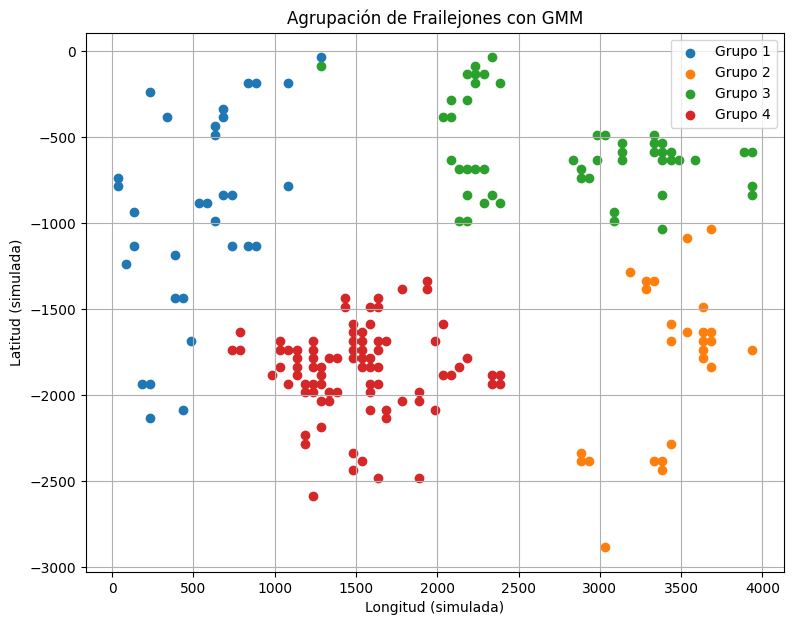

Densidad en Grupo 1: 32 / 4661 = 0.006865 cuadros con frailejones/cuadro total
Densidad en Grupo 2: 26 / 4661 = 0.005578 cuadros con frailejones/cuadro total
Densidad en Grupo 3: 51 / 4661 = 0.010942 cuadros con frailejones/cuadro total
Densidad en Grupo 4: 84 / 4661 = 0.018022 cuadros con frailejones/cuadro total

🔹 Densidad Total: 193 / 4661 = 0.041407 cuadros con frailejones/cuadro total


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Número de clusters
num_clusters = 4

# Aplicar GMM a las coordenadas de frailejones detectados
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
gmm.fit(frailejones_coords)
labels = gmm.predict(frailejones_coords)

# Contar cuadros totales (bloques de 70x70 píxeles con paso de 50)
total_cuadros = ((x.shape[0] - 50) // 50) * ((x.shape[1] - 50) // 50)

# Contar cuadros con frailejones en cada grupo
cuadros_por_grupo = np.array([np.sum(labels == i) for i in range(num_clusters)])

# Calcular densidades por grupo
densidades = cuadros_por_grupo / total_cuadros

# Calcular densidad total
total_cuadros_con_frailejones = np.sum(cuadros_por_grupo)
densidad_total = total_cuadros_con_frailejones / total_cuadros

# Graficar los clusters
plt.figure(figsize=(9, 7))
for cluster_id in range(num_clusters):
    cluster_points = frailejones_coords[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], -cluster_points[:, 1], label=f'Grupo {cluster_id + 1}')

plt.xlabel("Longitud (simulada)")
plt.ylabel("Latitud (simulada)")
plt.title("Agrupación de Frailejones con GMM")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar densidades calculadas
for i, dens in enumerate(densidades):
    print(f"Densidad en Grupo {i+1}: {cuadros_por_grupo[i]} / {total_cuadros} = {dens:.6f} cuadros con frailejones/cuadro total")

# Mostrar densidad total
print(f"\n🔹 Densidad Total: {total_cuadros_con_frailejones} / {total_cuadros} = {densidad_total:.6f} cuadros con frailejones/cuadro total")


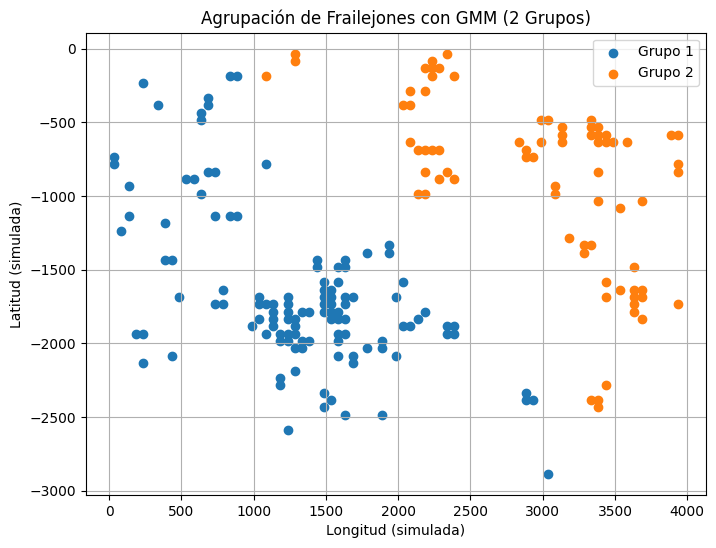

Densidad en Grupo 1: 118 / 4661 = 0.025316 cuadros con frailejones/cuadro total
Densidad en Grupo 2: 75 / 4661 = 0.016091 cuadros con frailejones/cuadro total

🔹 Densidad Total: 193 / 4661 = 0.041407 cuadros con frailejones/cuadro total


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Número de clusters reducido a 2
num_clusters = 2

# Aplicar GMM a las coordenadas de frailejones detectados
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
gmm.fit(frailejones_coords)
labels = gmm.predict(frailejones_coords)

# Contar cuadros totales (bloques de 70x70 píxeles con paso de 50)
total_cuadros = ((x.shape[0] - 50) // 50) * ((x.shape[1] - 50) // 50)

# Contar cuadros con frailejones en cada grupo
cuadros_por_grupo = np.array([np.sum(labels == i) for i in range(num_clusters)])

# Calcular densidades por grupo
densidades = cuadros_por_grupo / total_cuadros

# Calcular densidad total
total_cuadros_con_frailejones = np.sum(cuadros_por_grupo)
densidad_total = total_cuadros_con_frailejones / total_cuadros

# Graficar los clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    cluster_points = frailejones_coords[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], -cluster_points[:, 1], label=f'Grupo {cluster_id + 1}')

plt.xlabel("Longitud (simulada)")
plt.ylabel("Latitud (simulada)")
plt.title("Agrupación de Frailejones con GMM (2 Grupos)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar densidades calculadas
for i, dens in enumerate(densidades):
    print(f"Densidad en Grupo {i+1}: {cuadros_por_grupo[i]} / {total_cuadros} = {dens:.6f} cuadros con frailejones/cuadro total")

# Mostrar densidad total
print(f"\n🔹 Densidad Total: {total_cuadros_con_frailejones} / {total_cuadros} = {densidad_total:.6f} cuadros con frailejones/cuadro total")
